In [1]:
import pandas as pd 
import seaborn as sns 
import sqlite3
import numpy as np
from plotly import express as px

In [14]:
with sqlite3.connect("../tickets.db") as conn: 
    cmd = \
        """
        SELECT g.*, e.price, e.extractTime, e.ticket_count FROM extraction e
        LEFT JOIN games g on e.id = g.id
        """
    df = pd.read_sql_query(cmd, conn)
df['time'], df['extractTime'] = pd.to_datetime(df['time']), pd.to_datetime(df['extractTime'])
df['days_to_game'] = (df['time'] - df['extractTime'])
df['days_to_game'] = df['days_to_game'].apply(lambda X: X.days)
df = df.dropna()
df

,id,time,name,homeTeam,awayTeam,unique_name,price,extractTime,ticket_count,days_to_game
0,104722879.0,2021-06-11,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-11,58.62,2021-06-08 17:51:48.284897,0,2.0
1,104725408.0,2021-06-12,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-12,29.16,2021-06-08 17:51:48.284897,0,3.0
2,104725409.0,2021-06-13,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-13,28.04,2021-06-08 17:51:48.284897,0,4.0
3,104724531.0,2021-06-14,Philadelphia Phillies at Los Angeles Dodgers,Los Angeles Dodgers,Philadelphia Phillies,Philadelphia Phillies at Los Angeles Dodgers: ...,35.55,2021-06-08 17:51:48.284897,0,5.0
4,104725410.0,2021-06-15,Philadelphia Phillies at Los Angeles Dodgers,Los Angeles Dodgers,Philadelphia Phillies,Philadelphia Phillies at Los Angeles Dodgers: ...,24.99,2021-06-08 17:51:48.284897,0,6.0
...,...,...,...,...,...,...,...,...,...,...
611,104738380.0,2021-09-29,Arizona Diamondbacks at San Francisco Giants,San Francisco Giants,Arizona Diamondbacks,Arizona Diamondbacks at San Francisco Giants: ...,17.17,2021-06-10 12:10:34.477740,0,110.0
612,104736599.0,2021-09-30,Arizona Diamondbacks at San Francisco Giants,San Francisco Giants,Arizona Diamondbacks,Arizona Diamondbacks at San Francisco Giants: ...,17.17,2021-06-10 12:10:34.477742,0,111.0
613,104736601.0,2021-10-01,San Diego Padres at San Francisco Giants,San Francisco Giants,San Diego Padres,San Diego Padres at San Francisco Giants: 2021...,46.19,2021-06-10 12:10:34.477744,0,112.0
614,104738382.0,2021-10-02,San Diego Padres at San Francisco Giants,San Francisco Giants,San Diego Padres,San Diego Padres at San Francisco Giants: 2021...,58.47,2021-06-10 12:10:34.477746,0,113.0


<AxesSubplot:xlabel='days_to_game', ylabel='price'>

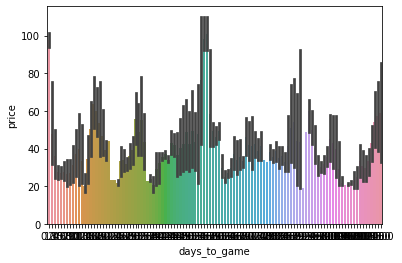

In [3]:
sns.barplot(x="days_to_game", y="price", data=df)

In [15]:
def diff_from_max(x):
    initial = x.to_numpy()[0]
    return (initial - x)/x

In [16]:
df["diff_initial"] = df.groupby("unique_name")["price"].transform(diff_from_max)

In [17]:
dodgers = df[df['homeTeam'] == 'Los Angeles Dodgers']

In [18]:
dodgers.sort_values("diff_initial")

,id,time,name,homeTeam,awayTeam,unique_name,price,extractTime,ticket_count,days_to_game,diff_initial
463,104722879.0,2021-06-11,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-11,101.43,2021-06-10 12:10:33.528934,0,0.0,-0.422064
309,104722879.0,2021-06-11,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-11,94.05,2021-06-10 00:25:10.995231,0,0.0,-0.376715
155,104722879.0,2021-06-11,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-11,75.28,2021-06-09 12:10:15.524332,0,1.0,-0.221307
464,104725408.0,2021-06-12,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-12,36.86,2021-06-10 12:10:33.528944,0,1.0,-0.208899
156,104725408.0,2021-06-12,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-12,36.35,2021-06-09 12:10:15.524341,0,2.0,-0.197799
...,...,...,...,...,...,...,...,...,...,...,...
314,104725411.0,2021-06-16,Philadelphia Phillies at Los Angeles Dodgers,Los Angeles Dodgers,Philadelphia Phillies,Philadelphia Phillies at Los Angeles Dodgers: ...,35.95,2021-06-10 00:25:10.995247,0,5.0,0.092907
465,104725409.0,2021-06-13,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-13,24.45,2021-06-10 12:10:33.528947,0,2.0,0.146830
311,104725409.0,2021-06-13,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-13,24.45,2021-06-10 00:25:10.995241,0,2.0,0.146830
312,104724531.0,2021-06-14,Philadelphia Phillies at Los Angeles Dodgers,Los Angeles Dodgers,Philadelphia Phillies,Philadelphia Phillies at Los Angeles Dodgers: ...,27.26,2021-06-10 00:25:10.995243,0,3.0,0.304109


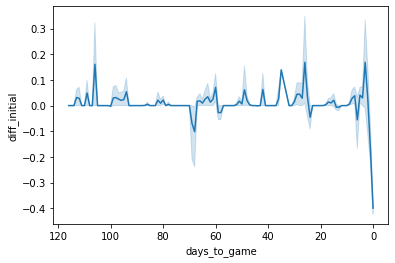

In [19]:
ax = sns.lineplot(x = "days_to_game", y = "diff_initial", data = df)
ax = ax.invert_xaxis()

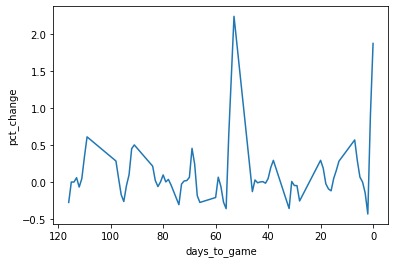

In [10]:
ax = sns.lineplot(x = "days_to_game", y = "pct_change", data = dodgers.groupby("days_to_game")[["pct_change"]].mean().reset_index())
ax = ax.invert_xaxis()

In [79]:
dodgers[dodgers["id"] == 104722879.0]

,id,time,name,homeTeam,awayTeam,unique_name,price,extractTime,ticket_count,days_to_game,diff_initial
0,104722879.0,2021-06-11,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-11,58.62,2021-06-08 17:51:48.284897,0,2.0,0.000000
155,104722879.0,2021-06-11,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-11,75.28,2021-06-09 12:10:15.524332,0,1.0,-0.221307
309,104722879.0,2021-06-11,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-11,94.05,2021-06-10 00:25:10.995231,0,0.0,-0.376715
463,104722879.0,2021-06-11,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-11,101.43,2021-06-10 12:10:33.528934,0,0.0,-0.422064


In [31]:
dodgers

,id,price,time,name,extractTime,homeTeam,awayTeam,days_to_game,unique_name,ticket_count,pct_change
0,104722879,58.62,2021-06-11 00:00:00,Texas Rangers at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Texas Rangers,2,Texas Rangers at Los Angeles Dodgers: 2021-06-11,0,0.604401
1,104725408,29.16,2021-06-12 00:00:00,Texas Rangers at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Texas Rangers,3,Texas Rangers at Los Angeles Dodgers: 2021-06-12,0,2.478395
2,104725409,28.04,2021-06-13 00:00:00,Texas Rangers at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Texas Rangers,4,Texas Rangers at Los Angeles Dodgers: 2021-06-13,0,-0.128031
3,104724531,35.55,2021-06-14 00:00:00,Philadelphia Phillies at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Philadelphia Phillies,5,Philadelphia Phillies at Los Angeles Dodgers: ...,0,-0.233193
4,104725410,24.99,2021-06-15 00:00:00,Philadelphia Phillies at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Philadelphia Phillies,6,Philadelphia Phillies at Los Angeles Dodgers: ...,0,0.078031
...,...,...,...,...,...,...,...,...,...,...,...
510,104724625,36.37,2021-09-30 00:00:00,San Diego Padres at Los Angeles Dodgers,2021-06-10 12:10:33.529101,Los Angeles Dodgers,San Diego Padres,111,San Diego Padres at Los Angeles Dodgers: 2021-...,0,0.000000
511,104724627,35.14,2021-10-01 00:00:00,San Diego Padres at Los Angeles Dodgers,2021-06-10 12:10:33.529103,Los Angeles Dodgers,San Diego Padres,112,San Diego Padres at Los Angeles Dodgers: 2021-...,0,0.000000
512,104724629,35.14,2021-10-02 00:00:00,Milwaukee Brewers at Los Angeles Dodgers,2021-06-10 12:10:33.529105,Los Angeles Dodgers,Milwaukee Brewers,113,Milwaukee Brewers at Los Angeles Dodgers: 2021...,0,0.000000
513,104724631,44.96,2021-10-03 00:00:00,Milwaukee Brewers at Los Angeles Dodgers,2021-06-10 12:10:33.529107,Los Angeles Dodgers,Milwaukee Brewers,114,Milwaukee Brewers at Los Angeles Dodgers: 2021...,0,-0.272909
